In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cw_sim
import datetime

In [ ]:
cold_load = cw_sim.Load(physical_temperature=383)
hot_load = cw_sim.Load(physical_temperature=3000)
reference_load = cw_sim.Load(physical_temperature=293)
log_power_meter = cw_sim.PowerMeter(feedback_factor_x=2, pink_noise_variance=1e-5, sample_rate=10, alpha=1.5, bit_depth=12, physical_temperature=300, 
                                    bandwidth=2e9)
reciever = cw_sim.Reciever(sample_rate=20e6, centre_frequency=70e6, fft_length=2048, noise_temperature=200, uncorrelated_reflected_noise_temp=20, sin_noise_temp=10, cos_noise_temp=10,
                           pink_noise_variance=1, alpha=1.5, window='Blackman', reflection_coefficients=0.01)

cw_source = cw_sim.CWSource(pink_noise_variance=1e-5, alpha=1.5, cw_power_dbm=-30, cw_frequency=75, attenuation_before_receiver_db=-30, receiver=reciever)


#simulation_parameters = cw_sim.SimulationParameters(number_of_qs=10, fractional_measurements=[1/3, 1/3 ,1/3], time_per_q=15, receiver=reciever)



#tod = cw_sim.TimeOrderedDataGenerator(colder_load=cold_load, hotter_load=hot_load, to_measure_port=reference_load, reciever=reciever, cw_source=cw_source,
#                                      power_meter=log_power_meter, simulation_parameters=simulation_parameters)
#tod.export_time_ordered_data(sample_integration_time=0.5,simulation_parameters=simulation_parameters, save_to_drive=True, file_location="ExportPlots/")

cw_sim.generate_multiple_qs(30, 10, cold_load=cold_load, hot_load=hot_load, to_meausure=reference_load, receiver=reciever, 
                            cw_source=cw_source, power_meter=log_power_meter, fractional_measurements=[1/3, 1/3, 1/3], file_location='ExportPlots/')




TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
processed_data = cw_sim.DataProcessor(file_location='ExportPlots/', number_of_side_cw_channels=2, number_of_cw_sys_channels=3, power_meter=log_power_meter,
                                      cold_load=cold_load, hot_load=hot_load, no_switching=False)
processed_data.plot_waterfall(save_plot=True, savepath='ExportPlots')
processed_data.plot_t_measured_spectrum(save_plot=True, savepath='ExportPlots/')

Loading and processing Data
Data Processed


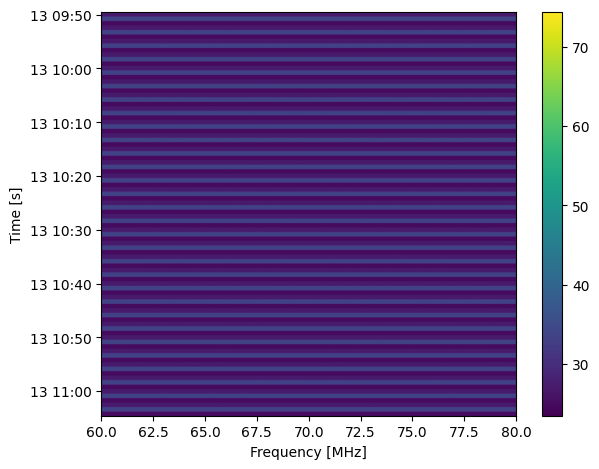

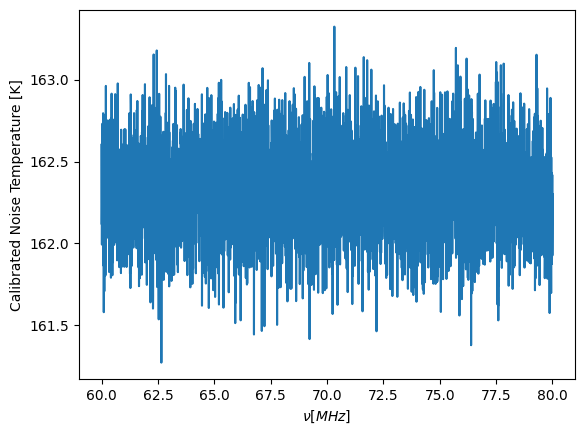

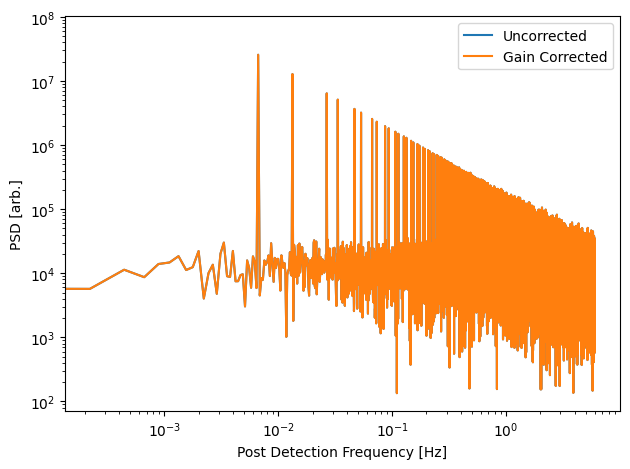

In [ ]:
processed_spectra = cw_sim.DataProcessor('NoSwitching/', 2, 3, log_power_meter, cold_load, hot_load)

processed_spectra = cw_sim.DataProcessor()

processed_spectra.plot_waterfall()

processed_spectra.plot_t_measured_spectrum()

processed_spectra.plot_post_detection_psd(70)

Need to define some runtime and parameters in order to data to be generated;

In [4]:
switch_times = np.load('ExportPlots_2/SwitchTimes.npy', allow_pickle=True)
        
print(switch_times)

[[0 datetime.datetime(2025, 2, 5, 15, 14, 8, 765222)]
 [1 datetime.datetime(2025, 2, 5, 15, 14, 12, 85628)]
 [2 datetime.datetime(2025, 2, 5, 15, 14, 15, 406034)]
 [0 datetime.datetime(2025, 2, 5, 15, 14, 18, 726440)]
 [1 datetime.datetime(2025, 2, 5, 15, 14, 22, 46846)]
 [2 datetime.datetime(2025, 2, 5, 15, 14, 25, 367252)]
 [0 datetime.datetime(2025, 2, 5, 15, 14, 28, 687658)]
 [1 datetime.datetime(2025, 2, 5, 15, 14, 32, 8064)]
 [2 datetime.datetime(2025, 2, 5, 15, 14, 35, 328470)]]


In [5]:
listy = [0,1,2,3,4]
print(listy[:-1])

[0, 1, 2, 3]
